In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import ast


In [2]:
df = pd.read_csv('clean_avis_v1.csv')
del(df['Unnamed: 0'])
df['avis_tokenized'] = df['avis_tokenized'].apply(ast.literal_eval)
df['avis_tokenized_str'] = df['avis_tokenized'].apply(lambda tokens: ' '.join(tokens))


# TF-IDF

In [3]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['avis_tokenized_str'], df['note'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
classifier = MultinomialNB()

# Create a pipeline to combine TF-IDF and the classifier
model = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', classifier)
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)



Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

         1.0       0.55      0.96      0.70      1398
         2.0       0.51      0.03      0.06       754
         3.0       0.36      0.05      0.08       664
         4.0       0.45      0.45      0.45       951
         5.0       0.54      0.68      0.60       935

    accuracy                           0.52      4702
   macro avg       0.48      0.43      0.38      4702
weighted avg       0.49      0.52      0.44      4702



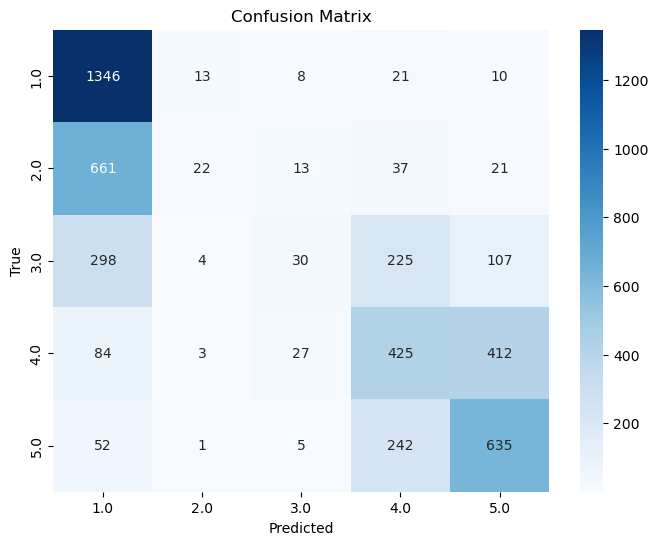

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['note'].unique()), yticklabels=sorted(df['note'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


X_train, X_test, y_train, y_test = train_test_split(
    df['avis_tokenized_str'], df['note'], test_size=0.2, random_state=42
)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

max_words = 620  
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

embedding_dim = 50  
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_padded, y_train_encoded, epochs=5, validation_data=(X_test_padded, y_test_encoded))

y_pred_prob = model.predict(X_test_padded)
y_pred = y_pred_prob.argmax(axis=-1)
y_pred_labels = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_labels)
classification_rep = classification_report(y_test, y_pred_labels)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Epoch 1/5
588/588 [==============================] - 12s 20ms/step - loss: 1.2394 - accuracy: 0.4610 - val_loss: 1.1212 - val_accuracy: 0.5021
Epoch 2/5
588/588 [==============================] - 12s 20ms/step - loss: 1.0773 - accuracy: 0.5190 - val_loss: 1.1086 - val_accuracy: 0.5204
Epoch 3/5
588/588 [==============================] - 12s 20ms/step - loss: 1.0100 - accuracy: 0.5548 - val_loss: 1.1161 - val_accuracy: 0.5138
Epoch 4/5
588/588 [==============================] - 12s 20ms/step - loss: 0.9206 - accuracy: 0.6058 - val_loss: 1.1625 - val_accuracy: 0.4968
Epoch 5/5
147/147 [==============================] - 0s 3ms/step
Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

         1.0       0.58      0.75      0.65      1398
         2.0       0.33      0.23      0.27       754
         3.0       0.27      0.11      0.15       664
         4.0       0.42      0.57      0.48       951
         5.0       0.58      0.51      0.54       935

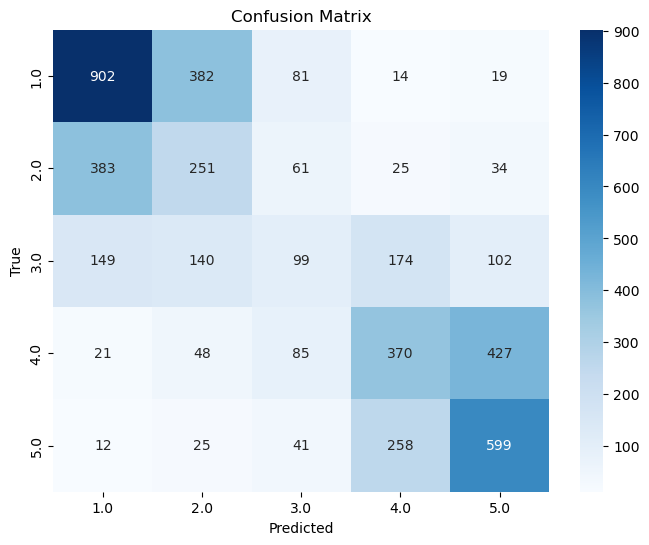

In [26]:

cm = confusion_matrix(y_test, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['note'].unique()), yticklabels=sorted(df['note'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    df['avis_tokenized_str'], df['note'], test_size=0.2, random_state=42
)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


max_words = 5000 
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

embedding_dim = 50 
embedding_matrix = np.zeros((max_words, embedding_dim))

glove_path = 'glove.6B.50d.txt'  

with open(glove_path, 'r', encoding='utf-8') as glove_file:
    for line in glove_file:
        values = line.split()
        word = values[0]
        if word in tokenizer.word_index and tokenizer.word_index[word] < max_words:
            embedding_matrix[tokenizer.word_index[word]] = np.array(values[1:], dtype='float32')

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_padded, y_train_encoded, epochs=5, validation_data=(X_test_padded, y_test_encoded))

y_pred_prob = model.predict(X_test_padded)
y_pred = y_pred_prob.argmax(axis=-1)
y_pred_labels = label_encoder.inverse_transform(y_pred)


accuracy = accuracy_score(y_test, y_pred_labels)
classification_rep = classification_report(y_test, y_pred_labels)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Epoch 1/5
588/588 [==============================] - 13s 21ms/step - loss: 1.3250 - accuracy: 0.4340 - val_loss: 1.3030 - val_accuracy: 0.4368
Epoch 2/5
588/588 [==============================] - 12s 20ms/step - loss: 1.1661 - accuracy: 0.5029 - val_loss: 1.3427 - val_accuracy: 0.4266
Epoch 3/5
588/588 [==============================] - 13s 22ms/step - loss: 0.9940 - accuracy: 0.5918 - val_loss: 1.4434 - val_accuracy: 0.3977
Epoch 4/5
588/588 [==============================] - 13s 22ms/step - loss: 0.7981 - accuracy: 0.6902 - val_loss: 1.6024 - val_accuracy: 0.3841
Epoch 5/5
147/147 [==============================] - 1s 4ms/step
Accuracy: 0.39
Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.58      0.54      1398
         2.0       0.26      0.19      0.22       754
         3.0       0.18      0.12      0.14       664
         4.0       0.33      0.36      0.34       951
         5.0       0.43      0.48      0.45       935

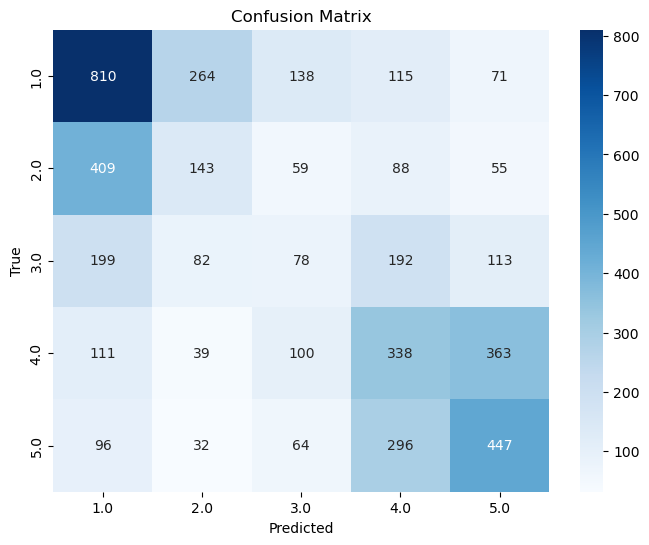

In [30]:

cm = confusion_matrix(y_test, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['note'].unique()), yticklabels=sorted(df['note'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import tensorflow_hub as hub


df['avis_tokenized_str'] = df['avis_tokenized'].apply(lambda tokens: ' '.join(tokens))

X_train, X_test, y_train, y_test = train_test_split(
    df['avis_tokenized_str'], df['note'], test_size=0.2, random_state=42
)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

use_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(use_url)

X_train_embed = embed(X_train)
X_test_embed = embed(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(512,)),  # USE embeddings have size 512
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_embed, y_train_encoded, epochs=5, validation_data=(X_test_embed, y_test_encoded))

y_pred_prob = model.predict(X_test_embed)
y_pred = y_pred_prob.argmax(axis=-1)
y_pred_labels = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_labels)
classification_rep = classification_report(y_test, y_pred_labels)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Epoch 1/5
588/588 [==============================] - 2s 3ms/step - loss: 1.1617 - accuracy: 0.4946 - val_loss: 1.1306 - val_accuracy: 0.5064
Epoch 2/5
588/588 [==============================] - 2s 3ms/step - loss: 1.0985 - accuracy: 0.5195 - val_loss: 1.1240 - val_accuracy: 0.5021
Epoch 3/5
588/588 [==============================] - 2s 3ms/step - loss: 1.0759 - accuracy: 0.5321 - val_loss: 1.1271 - val_accuracy: 0.4987
Epoch 4/5
588/588 [==============================] - 2s 3ms/step - loss: 1.0529 - accuracy: 0.5454 - val_loss: 1.1225 - val_accuracy: 0.5038
Epoch 5/5
147/147 [==============================] - 0s 1ms/step
Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

         1.0       0.58      0.86      0.69      1398
         2.0       0.32      0.10      0.15       754
         3.0       0.28      0.14      0.19       664
         4.0       0.42      0.40      0.41       951
         5.0       0.52      0.63      0.57       935

    ac

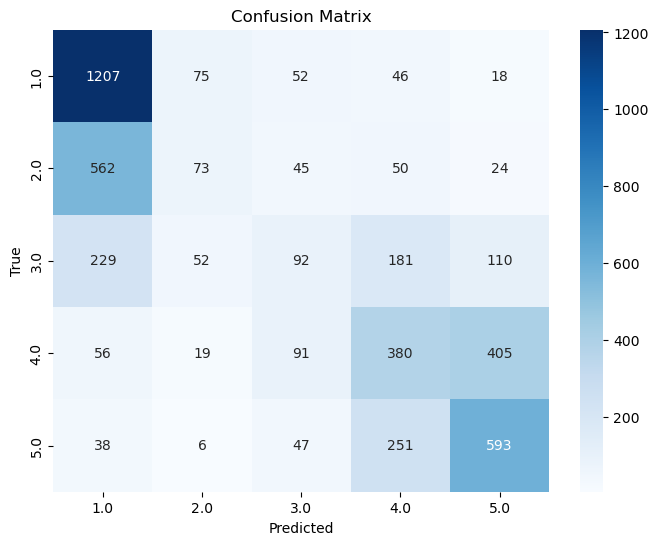

In [32]:

cm = confusion_matrix(y_test, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['note'].unique()), yticklabels=sorted(df['note'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
from transformers import pipeline

def perform_sentiment_analysis(sentences):
    # Load the pre-trained sentiment analysis model from the transformers library
    sentiment_analyzer = pipeline("sentiment-analysis")

    # Analyze sentiment for each sentence in the input list
    results = sentiment_analyzer(sentences)

    # Extract sentiment labels from the results
    sentiments = [result['label'] for result in results]

    return sentiments


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\paulr\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\paulr\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Sentence: I love this product! | Sentiment: POSITIVE
Sentence: It's okay, not too impressed. | Sentiment: POSITIVE
Sentence: This is terrible. | Sentiment: NEGATIVE


In [ ]:

# Example usage:
sentences_to_analyze = ["I love this product!", "It's okay, not too impressed.", "This is terrible."]
sentiments_result = perform_sentiment_analysis(sentences_to_analyze)

# Display the results
for sentence, sentiment in zip(sentences_to_analyze, sentiments_result):
    print(f"Sentence: {sentence} | Sentiment: {sentiment}")
